In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [14]:
data_dir = r'../data/'

data = pd.DataFrame()

for entry in os.scandir(data_dir):
    if (entry.path.endswith('.json') and entry.is_file()):
        if data.empty:
            data = pd.read_json(entry.path)
        else:
            entry_data = pd.read_json(entry.path)
            data = pd.concat([data, entry_data], ignore_index=True)

In [17]:
# Let's remove duplicates and show the data.
print(data.shape)
data.drop_duplicates(subset ="post_id", 
                     keep = "last", inplace = True)

print(data.shape)
print(data.head())

(2998, 17)
(2094, 17)
      post_id   brand                                                url  \
0  7126452793  nissan  https://vancouver.craigslist.org/van/ctd/d/ric...   
1  7126422024   mazda  https://vancouver.craigslist.org/nvn/cto/d/nor...   
2  7126435776    ford  https://vancouver.craigslist.org/nvn/cto/d/nor...   
3  7126456880    audi  https://vancouver.craigslist.org/van/ctd/d/van...   
4  7126461218     bmw  https://vancouver.craigslist.org/van/ctd/d/200...   

   price  year        model  condition    cylinders    fuel  odometer  \
0  25888  2019        rogue  excellent  4 cylinders     gas   30128.0   
1   2200  2007            3       good         None     gas  220337.0   
2  60000  1957  thunderbird   like new  8 cylinders     gas   39000.0   
3  16980  2012           a3  excellent  4 cylinders  diesel   57350.0   
4  13980  2008           x3  excellent  6 cylinders     gas   61500.0   

  title status transmission                VIN drive  size   type paint color  
0 

In [4]:
# Things deemed not important:
# fuel, VIN, drive, size, type

# Check NA (percentage missing):
data.isnull().sum() *100 / len(data)

post_id          0.000000
brand            6.604403
url              0.000000
price            0.000000
year             0.000000
model            0.000000
condition       22.615077
cylinders       30.020013
fuel             0.000000
odometer        21.647765
title status     0.000000
transmission     0.000000
VIN             79.719813
drive           32.088059
size            58.205470
type            34.156104
paint color     32.321548
dtype: float64

In [6]:
# Above 25% missing:
# Cylinders, VIN, drive, size, type, paint color
# For cylinders, VIN, drive, size and type, we will remove the columns as a whole. These aren't important
# in the grand scheme of things, because when a vehicle is searched, it's assumed these are constant for that model 
# (except VIN).

data.drop(['cylinders', 'VIN', 'drive', 'size', 'type'], axis=1, inplace=True)

In [7]:
print(data.isnull().sum() *100 / len(data))
data.head(5)

post_id          0.000000
brand            6.604403
url              0.000000
price            0.000000
year             0.000000
model            0.000000
condition       22.615077
fuel             0.000000
odometer        21.647765
title status     0.000000
transmission     0.000000
paint color     32.321548
dtype: float64


,post_id,brand,url,price,year,model,condition,fuel,odometer,title status,transmission,paint color
0,7126452793,nissan,https://vancouver.craigslist.org/van/ctd/d/ric...,25888,2019,rogue,excellent,gas,30128.0,clean,automatic,grey
1,7126422024,mazda,https://vancouver.craigslist.org/nvn/cto/d/nor...,2200,2007,3,good,gas,220337.0,clean,manual,black
2,7126435776,ford,https://vancouver.craigslist.org/nvn/cto/d/nor...,60000,1957,thunderbird,like new,gas,39000.0,clean,automatic,None
3,7126456880,audi,https://vancouver.craigslist.org/van/ctd/d/van...,16980,2012,a3,excellent,diesel,57350.0,clean,automatic,silver
4,7126461218,bmw,https://vancouver.craigslist.org/van/ctd/d/200...,13980,2008,x3,excellent,gas,61500.0,clean,automatic,None


In [8]:
# That looks better.

# What should we do about our missing data?
# Well, if we drop all na, then we are left with about only half of the data. 
# That won't be good.

In [9]:
data.dropna().shape

(1603, 12)

In [10]:
# a problem to deal with:
# people love to put the odometer, in kms, instead of a full amount. (eg if it's at 150,000 kms, they just put 150)
# an idea: if year < 2015 and odometer < 400, multiply odometer by 1,000? 
# people will typically round the odometer to the thousandth, so i feel this would not be a bad idea.
# will put more thought into it.

In [11]:
data[data['odometer'] == 200.0]
# you can see that these vehicles are all older, and are definitely not only 200 kms driven.
# 200,000 sounds about right.

,post_id,brand,url,price,year,model,condition,fuel,odometer,title status,transmission,paint color
276,7127105161,chevrolet,https://vancouver.craigslist.org/bnc/cto/d/new...,1400,2002,impala,good,gas,200.0,clean,automatic,grey
1159,7128372979,toyota,https://vancouver.craigslist.org/van/cto/d/sur...,7500,2011,2011 sienna,excellent,gas,200.0,rebuilt,automatic,black
1212,7128372979,toyota,https://vancouver.craigslist.org/van/cto/d/sur...,7500,2011,2011 sienna,excellent,gas,200.0,rebuilt,automatic,black
1239,7128351236,acura,https://vancouver.craigslist.org/rch/cto/d/ric...,5500,2005,mdx awd,good,gas,200.0,clean,automatic,grey
1241,7128347059,bmw,https://vancouver.craigslist.org/bnc/cto/d/pit...,5500,2006,330i,like new,gas,200.0,clean,automatic,silver
1337,7128347059,bmw,https://vancouver.craigslist.org/bnc/cto/d/pit...,5500,2006,330i,like new,gas,200.0,clean,automatic,silver


Text(0.5, 0, 'count')

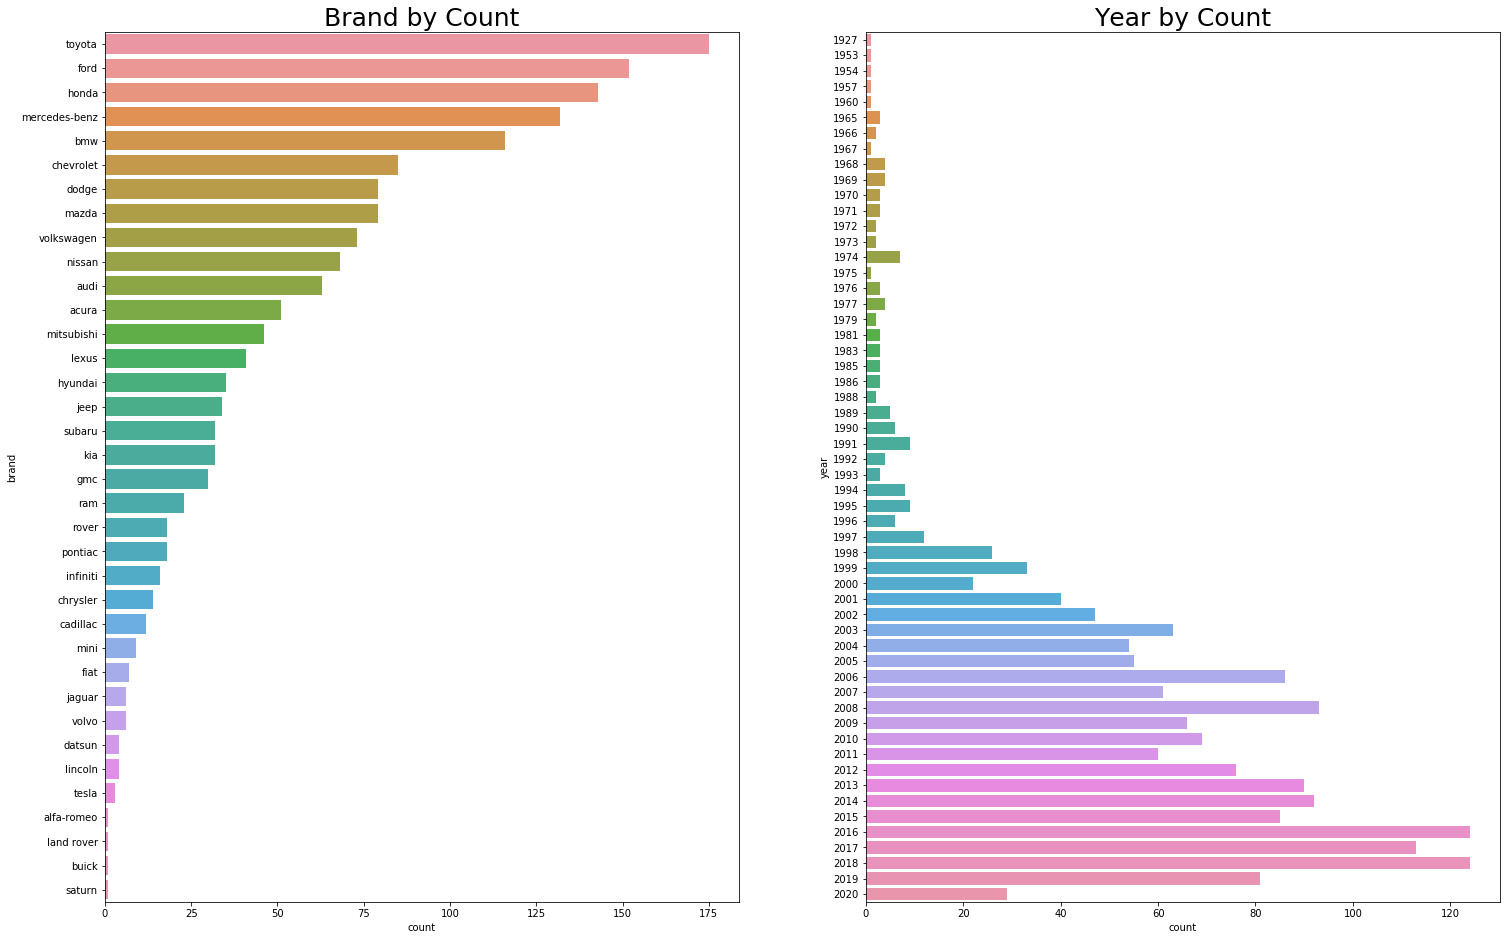

In [125]:
fig, axes = plt.subplots(1,2,figsize=(25,16))

(sns.barplot(y=data.brand.value_counts().index, x=data.brand.value_counts(), orient='h',ax=axes[0])
 .set_title('Brand by Count',fontsize=25))
axes[0].set_ylabel('brand')
axes[0].set_xlabel('count')
(sns.barplot(y=data.year.value_counts().index, x=data.year.value_counts(), orient='h',ax=axes[1])
 .set_title('Year by Count',fontsize=25))
axes[1].set_ylabel('year')
axes[1].set_xlabel('count')

In [32]:
# Remove all vehicles with odometer = 0 and year <= 2018
data[data['odometer'] == False][data['year'] <= 2018]


# data[data['odometer'] < 1000.0][data['year'] <= 2015]

# data[data['odometer'] < 1000.0][data['year'] > 2015][data['year'] < 2019]


# data[data['odometer'] < 1000.0][data['year'] > 2015][data['title status'] != 'rebuilt']

C:\Users\justi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,post_id,brand,url,price,year,model,condition,cylinders,fuel,odometer,title status,transmission,VIN,drive,size,type,paint color
1758,7129764787,mercedes-benz,https://vancouver.craigslist.org/van/ctd/d/bur...,34985,2018,metris cargo van,like new,4 cylinders,gas,0.0,clean,automatic,None,None,None,van,white
